In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(context='notebook', style='darkgrid', palette='colorblind')

# Statistical Analysis and NaN search

In [4]:
df_raw = pd.read_csv('~/Desktop/NeuralNetworks/codes/150k.csv')

In [5]:
# Count -9999 NaN

(df_raw==-9999).sum(numeric_only=False).sum()       # 345 '-9999' NaN

np.int64(345)

In [6]:
# Identify rows with NaN -9999 and remove them

df_clean = df_raw[(df_raw != -9999).all(axis=1)].reset_index(drop=True)
df_clean


,z,zErr,dec,decErr,dered_g,dered_i,dered_r,dered_u,dered_z,deVRad_g,...,psfMag_i,psfMag_r,psfMag_u,psfMag_z,psfMagErr_g,psfMagErr_i,psfMagErr_r,psfMagErr_u,psfMagErr_z,ra
0,1.967009,0.001295,0.099945,0.004153,18.74923,18.55813,18.67467,18.87822,18.45218,0.091994,...,18.92338,19.15566,19.76303,18.72110,0.017365,0.015810,0.015986,0.029013,0.033841,57.405766
1,0.133383,0.000062,0.075584,0.009540,19.82256,18.39337,18.82100,21.98708,18.03142,0.833777,...,19.37808,19.95601,23.14468,18.83381,0.053584,0.083252,0.069951,0.343517,0.051267,57.488430
2,0.505413,0.000175,0.036211,0.036408,21.45808,18.62883,19.56389,21.53409,18.04682,0.939758,...,20.09372,21.19098,23.46836,19.39700,0.149051,0.025049,0.041548,0.401160,0.053212,57.590708
3,1.248642,0.000341,0.971539,0.012089,20.41834,20.08604,19.99310,20.21941,20.27955,0.230714,...,20.20711,20.18484,20.56856,20.31880,0.037061,0.045533,0.028918,0.050030,0.120847,44.283683
4,0.066696,0.000006,1.047021,0.015802,19.00809,18.25147,18.56176,19.90209,18.13738,1.461907,...,19.12809,19.55080,21.05799,18.91005,0.019690,0.023346,0.018100,0.068637,0.039914,49.275599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149978,0.523190,0.000102,56.332271,0.039700,21.26369,18.45656,19.38538,23.55142,17.99068,2.787953,...,19.47815,20.38832,24.53234,19.02971,0.108178,0.022276,0.038616,0.875940,0.045896,141.116087
149979,0.508194,0.000221,61.501827,0.044107,22.25257,19.64563,20.59183,22.66739,19.18695,3.709756,...,20.54820,21.43578,23.25575,20.00042,0.156003,0.046724,0.055938,0.410539,0.105663,225.231674
149980,0.234232,0.000044,61.015388,0.012894,18.94200,17.13919,17.64632,20.86497,16.80165,4.772612,...,19.02218,19.42988,22.61482,18.63499,0.027229,0.018064,0.016232,0.230208,0.036420,226.317436
149981,0.352076,0.000068,60.126007,0.015690,20.67480,18.40559,19.04279,22.63412,17.99781,1.564977,...,19.36206,19.97786,23.25273,18.96493,0.050867,0.023696,0.025761,0.385661,0.046441,228.298076


In [7]:
# Compute moments for all variables: mean, variance, skewness, kurtosis

kurtosis = df_clean.kurtosis(numeric_only=True)
skewness = df_clean.skew(numeric_only=True)
mean = df_clean.mean(numeric_only=True)
variance = df_clean.var(numeric_only=True)

# build dataframe with the moments
moments = pd.DataFrame({'Mean': mean, 'Variance': variance, 'Skewness': skewness, 'Kurtosis': kurtosis})
moments

,Mean,Variance,Skewness,Kurtosis
z,0.623574,0.463679,2.233618,5.469135
zErr,0.009048,0.250511,81.310076,8237.162368
dec,26.068947,745.112586,0.185127,-1.756147
decErr,0.046216,0.003268,10.096847,370.267531
dered_g,20.384270,3.860253,-0.391109,-0.673984
...,...,...,...,...
psfMagErr_i,0.060868,0.122609,47.024034,3765.163399
psfMagErr_r,0.082667,2.823684,338.559555,124733.136502
psfMagErr_u,0.438192,2.090329,184.528468,49219.476784
psfMagErr_z,0.106176,0.076493,47.993031,4002.423180


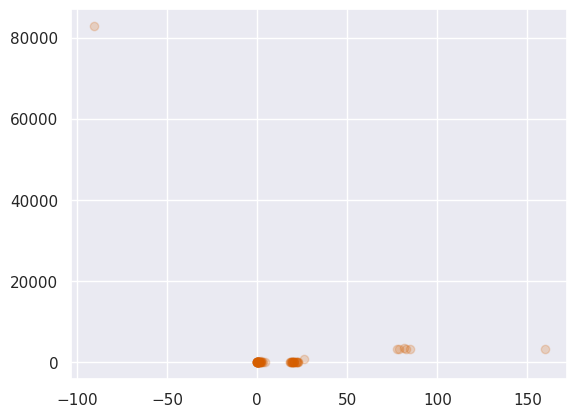

In [8]:
plt.plot(moments['Mean'], moments['Variance'], 'ro', alpha=.2)

- First take care of this high variance variable, then filter and check again

In [19]:
# Identify this high variance variable

moments[moments['Variance']>80000]

,Mean,Variance,Skewness,Kurtosis
petroRadErr_r,-90.636396,82849.866959,-2.842803,6.081671


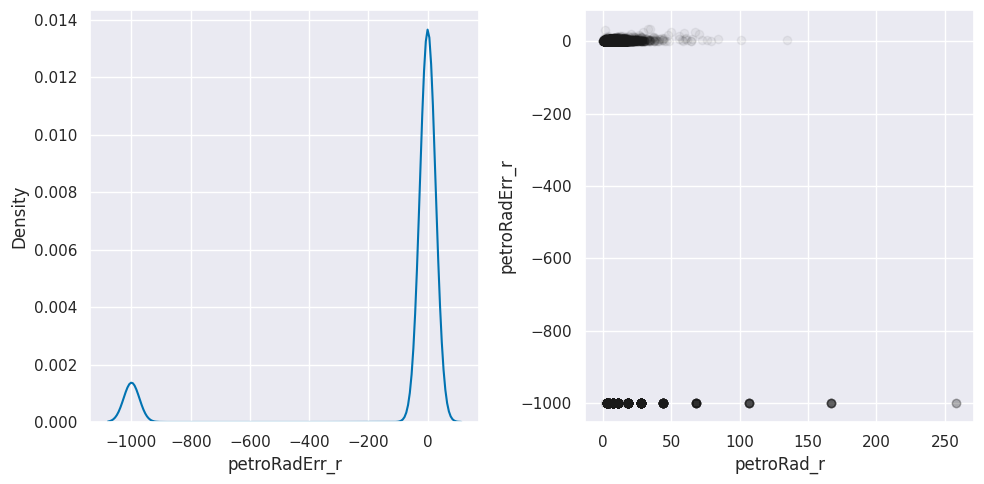

In [67]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.kdeplot(data=df_clean, x='petroRadErr_r',ax=ax[0])
ax[1].plot(df_clean['petroRad_r'],df_clean['petroRadErr_r'], 'ko', alpha=.05)
ax[1].set_xlabel('petroRad_r')
ax[1].set_ylabel('petroRadErr_r')

plt.tight_layout()

In [32]:
# There u go, more NaN

df_clean[df_clean['petroRadErr_r']==-1000]

,z,zErr,dec,decErr,dered_g,dered_i,dered_r,dered_u,dered_z,deVRad_g,...,psfMag_i,psfMag_r,psfMag_u,psfMag_z,psfMagErr_g,psfMagErr_i,psfMagErr_r,psfMagErr_u,psfMagErr_z,ra
2,0.505413,0.000175,0.036211,0.036408,21.45808,18.62883,19.56389,21.53409,18.04682,0.939758,...,20.09372,21.19098,23.46836,19.39700,0.149051,0.025049,0.041548,0.401160,0.053212,57.590708
19,0.461551,0.000093,0.630680,0.042475,22.39124,19.64379,20.66154,24.46195,19.16456,0.390522,...,20.52433,21.56934,24.56335,20.01338,0.188382,0.048002,0.072166,0.981649,0.085274,37.283294
24,0.704249,0.000188,0.905266,0.113456,21.64398,18.95818,20.25848,23.36737,18.34839,3.699732,...,20.63133,22.17416,23.94472,19.92391,0.223112,0.041982,0.098895,0.580111,0.079367,56.159150
25,0.384630,0.000202,0.944911,0.044276,21.99326,19.21411,19.98687,24.35744,18.86664,12.314840,...,20.51028,21.37318,24.68530,19.98701,0.240738,0.038986,0.052589,0.712043,0.085415,56.297503
77,0.139180,0.000023,0.943500,0.145410,19.56672,18.86415,19.23410,20.79498,20.54739,13.611600,...,21.90196,22.43315,23.88133,21.99833,0.126650,0.123167,0.126432,0.414979,0.698121,55.959601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149931,0.053030,0.000024,52.352527,0.090584,18.00815,17.26132,17.49836,19.40170,17.08686,19.120320,...,20.00698,20.24039,21.78025,19.83243,0.038708,0.038024,0.033485,0.157678,0.098439,126.089960
149939,0.811512,0.000376,58.811308,0.126916,24.71308,20.39412,22.02971,22.41031,19.50558,29.670270,...,21.79066,23.25561,24.12554,20.97063,0.575686,0.126622,0.349694,0.789875,0.259331,138.409929
149944,0.405915,0.000094,61.171518,0.029620,21.29836,18.65532,19.35833,23.31296,18.21292,1.619148,...,19.96521,20.56061,23.64412,19.42097,0.107033,0.058942,0.038068,0.554383,0.067179,144.395435
149948,0.526609,0.000121,62.371664,0.111097,22.34081,19.49384,20.50241,25.10361,18.79486,0.637124,...,20.84233,21.90156,24.86750,20.16576,0.262316,0.054439,0.096310,0.719670,0.110338,147.390488


Well, that's a bit much...

Text(0.5, 0, 'Mean')

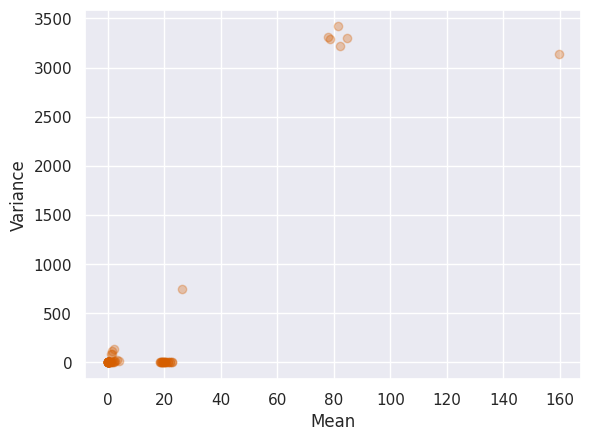

In [73]:
# Filter this variable and go again

plt.plot(moments.drop('petroRadErr_r')['Mean'], moments.drop('petroRadErr_r')['Variance'], 'ro', alpha=.3)
plt.ylabel('Variance')
plt.xlabel('Mean')

In [75]:
# Identify high variance variables

moments[moments['Variance']>3000].drop('petroRadErr_r')

,Mean,Variance,Skewness,Kurtosis
expPhi_g,77.760353,3307.210941,0.159768,-0.492243
expPhi_i,82.293326,3219.892924,0.034826,-0.407842
expPhi_r,84.824056,3301.723113,-0.016183,-0.437914
expPhi_u,81.519477,3418.428656,0.036971,-0.548888
expPhi_z,78.525695,3287.755210,0.043655,-0.473961
ra,159.663012,3142.965812,-0.624247,0.362428


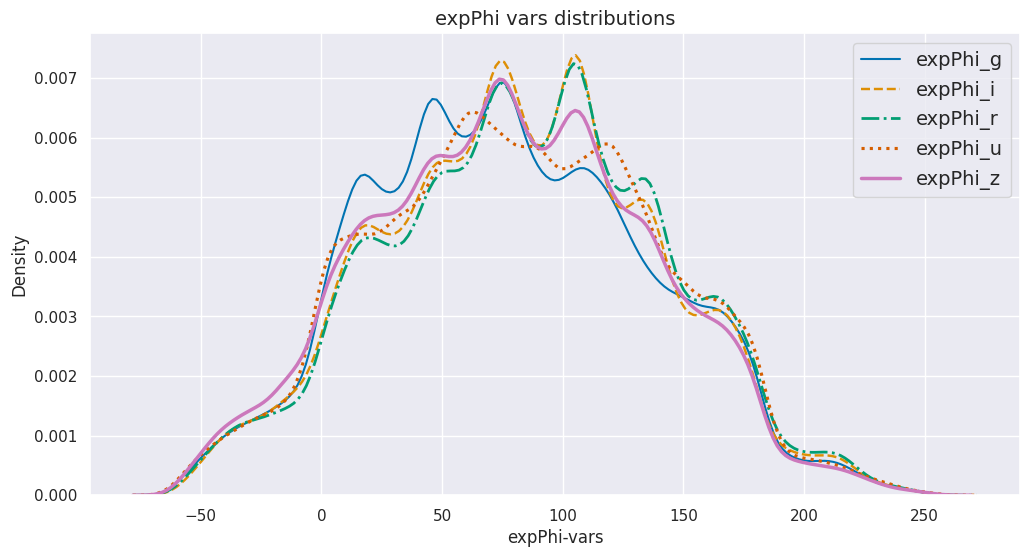

In [ ]:
# Visualize expPhi distributions

vars = moments[moments['Variance']>3000].drop(['petroRadErr_r', 'ra']).index
styles = ['-', '--', '-.', ':', '-']
lws = np.linspace(1.5, 2.5, 5)

plt.figure(figsize=(12,6)); fs=14
plt.title('expPhi vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('expPhi-vars')
plt.legend(fontsize=fs)

plt.savefig('../IMG/expPhi_KDE.png', dpi=400)

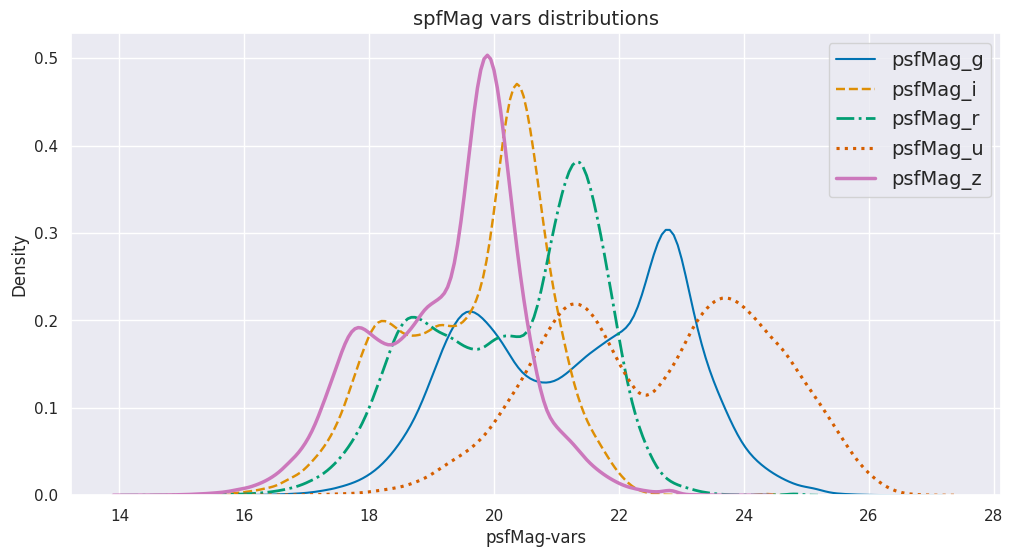

In [98]:
## More plots

vars = ['psfMag_g', 'psfMag_i', 'psfMag_r', 'psfMag_u', 'psfMag_z']
styles = ['-', '--', '-.', ':', '-']
lws = np.linspace(1.5, 2.5, 5)

plt.figure(figsize=(12,6)); fs=14
plt.title('spfMag vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('psfMag-vars')
plt.legend(fontsize=fs)

plt.savefig('../IMG/spfMag_KDE.png', dpi=400)

In [102]:
df_clean.columns

Index(['z', 'zErr', 'dec', 'decErr', 'dered_g', 'dered_i', 'dered_r',
       'dered_u', 'dered_z', 'deVRad_g', 'deVRad_i', 'deVRad_r', 'deVRad_z',
       'deVRadErr_g', 'deVRadErr_i', 'deVRadErr_r', 'deVRadErr_z', 'expPhi_g',
       'expPhi_i', 'expPhi_r', 'expPhi_u', 'expPhi_z', 'expRad_g', 'expRad_i',
       'expRad_r', 'expRad_z', 'expRadErr_g', 'expRadErr_i', 'expRadErr_r',
       'expRadErr_z', 'extinction_g', 'extinction_i', 'extinction_r',
       'extinction_u', 'extinction_z', 'fiberMag_g', 'fiberMag_i',
       'fiberMag_r', 'fiberMag_u', 'fiberMag_z', 'fiberMagErr_g',
       'fiberMagErr_i', 'fiberMagErr_r', 'fiberMagErr_u', 'fiberMagErr_z',
       'modelMag_g', 'modelMag_i', 'modelMag_r', 'modelMag_u', 'modelMag_z',
       'modelMagErr_g', 'modelMagErr_i', 'modelMagErr_r', 'modelMagErr_u',
       'modelMagErr_z', 'petroRad_r', 'petroRadErr_r', 'psfMag_g', 'psfMag_i',
       'psfMag_r', 'psfMag_u', 'psfMag_z', 'psfMagErr_g', 'psfMagErr_i',
       'psfMagErr_r', 'psfMagErr_u', 

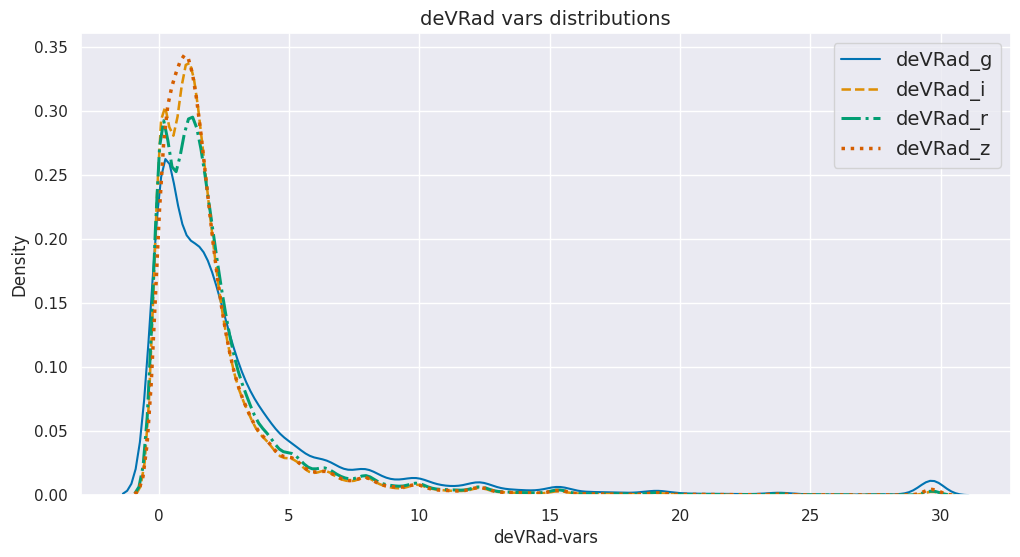

In [106]:
## More plots

vars = ['deVRad_g', 'deVRad_i', 'deVRad_r', 'deVRad_z']
styles = ['-', '--', '-.', ':']
lws = np.linspace(1.5, 2.5, 4)

plt.figure(figsize=(12,6)); fs=14
plt.title('deVRad vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('deVRad-vars')
plt.legend(fontsize=fs)

plt.savefig('../IMG/deVRad_KDE.png', dpi=400)

- Investigate this local mode at the right, since it's present in all filters, it looks like something meaningful (not a Nan)

In [ ]:
## More plots

vars = ['fiberMag_g', 'fiberMag_i',
       'fiberMag_r', 'fiberMag_u', 'fiberMag_z']
styles = ['-', '--', '-.', ':', '-']
lws = np.linspace(1.5, 2.5, 5)

plt.figure(figsize=(12,6)); fs=14
plt.title('fiberMag vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('fiberMag-vars')
plt.legend(fontsize=fs)

#plt.savefig('../IMG/fiberMag_KDE.png', dpi=400)

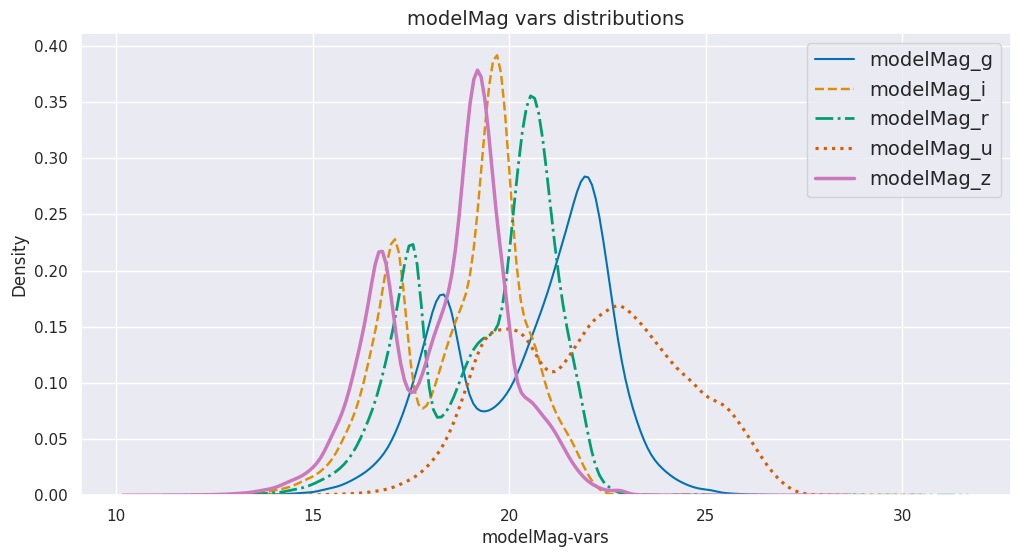

In [ ]:
## More plots

vars = ['dered_g', 'dered_i', 'dered_r',
       'dered_u', 'dered_z']
styles = ['-', '--', '-.', ':', '-']
lws = np.linspace(1.5, 2.5, 5)

plt.figure(figsize=(12,6)); fs=14
plt.title('dered vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('dered-vars')
plt.legend(fontsize=fs)

#plt.savefig('../IMG/dered_KDE.png', dpi=400)

In [ ]:
## More plots

vars = ['modelMag_g', 'modelMag_i', 'modelMag_r', 'modelMag_u', 'modelMag_z']
styles = ['-', '--', '-.', ':', '-']
lws = np.linspace(1.5, 2.5, 5)

plt.figure(figsize=(12,6)); fs=14
plt.title('modelMag vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('modelMag-vars')
plt.legend(fontsize=fs)

plt.savefig('../IMG/modelMag_KDE.png', dpi=400)

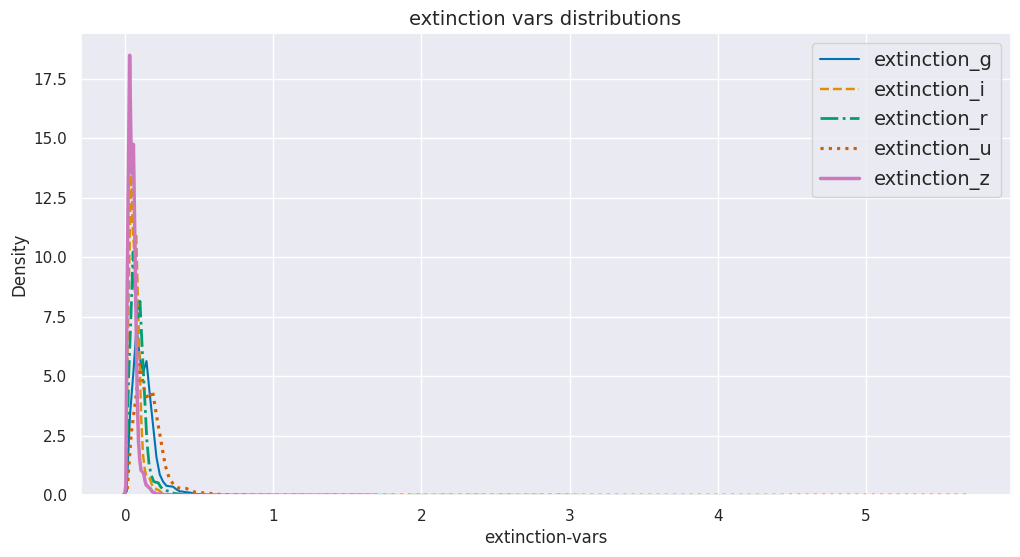

In [ ]:
## More plots

vars = ['extinction_g', 'extinction_i', 'extinction_r',
       'extinction_u', 'extinction_z']
styles = ['-', '--', '-.', ':', '-']
lws = np.linspace(1.5, 2.5, 5)

plt.figure(figsize=(12,6)); fs=14
plt.title('extinction vars distributions', fontsize=fs)

for var, style, lw in zip(vars, styles, lws):
    sns.kdeplot(data=df_clean, x=var, label=var, linestyle=style, linewidth=lw)

plt.xlabel('extinction-vars')
plt.legend(fontsize=fs)

#plt.savefig('../IMG/extinction_KDE.png', dpi=400)

# Applied some filters

- Any NaNs here?

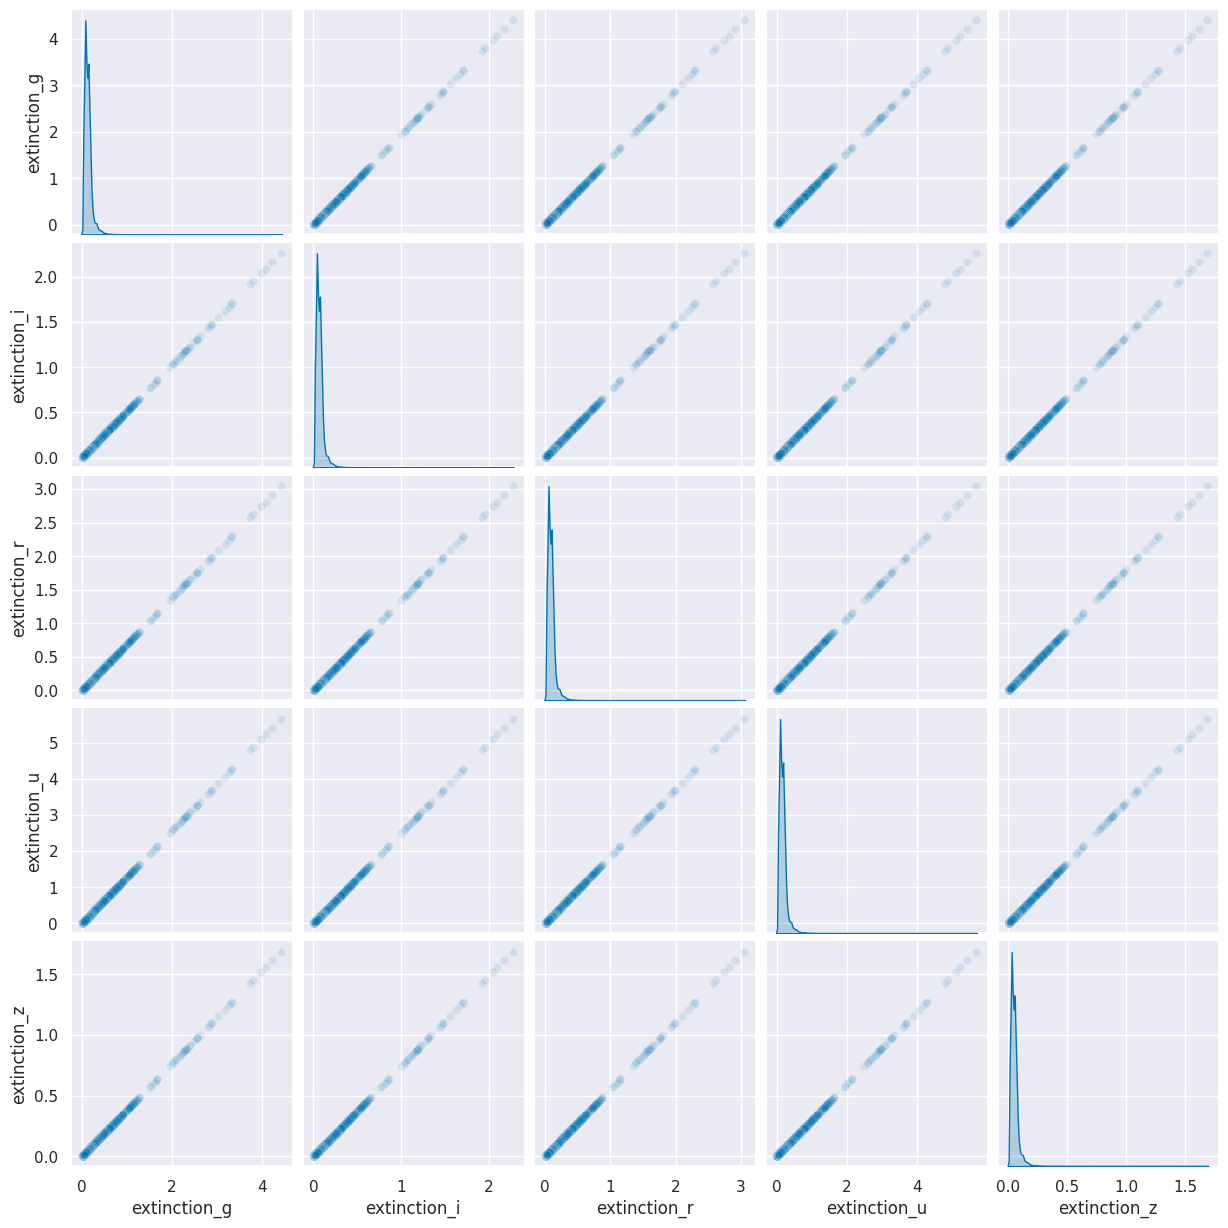

In [116]:
## further analyze extinction

df_ext = df_clean[vars]

sns.pairplot(df_ext, diag_kind='kde', kind="scatter", plot_kws={'alpha': 0.1})

plt.savefig('../IMG/extinction_pairplot.png', dpi=400)

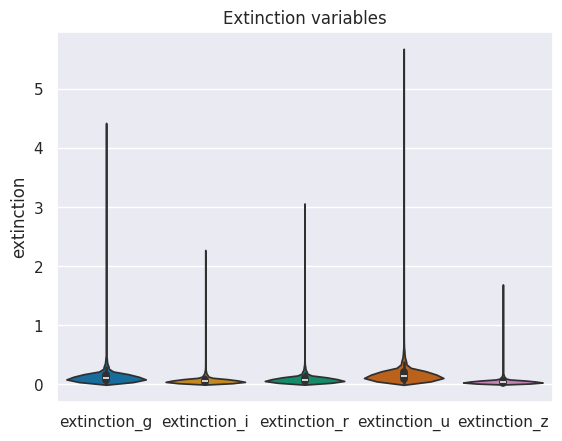

In [130]:
### Identify outliers

plt.title('Extinction variables');
plt.ylabel('extinction')
sns.violinplot(data=df_ext)

plt.savefig('../IMG/extinction_violin.png', dpi=350)

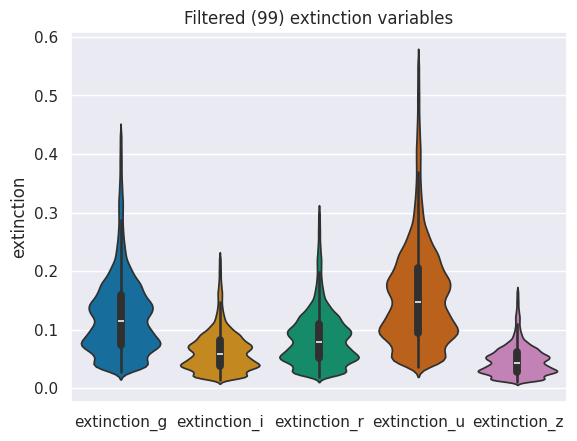

In [ ]:
### Filter outliers

th = 0.99
df_ext_filtered = df_ext[(df_ext < df_ext.quantile(th)).all(axis=1) & (df_ext > df_ext.quantile(1-th)).all(axis=1)]
plt.title('Filtered (99) extinction variables');
plt.ylabel('extinction')
sns.violinplot(df_ext_filtered)

#plt.savefig('../IMG/filtered99_extinction_violin.png', dpi=300)

- Discutir si acaso debemos hacer un filtro de 95, 99 u otro valor
- Podemos justificar este filtro con el cambio en el skewness o calculando a cuántos sigmas de distancia hay entre estos valores y la media

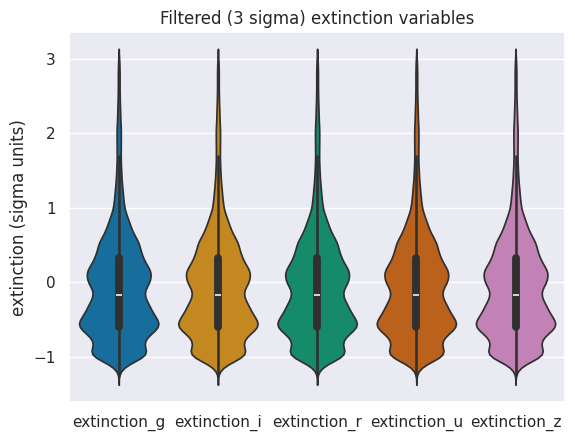

In [ ]:
## Calculate distance in sigma units for all extinction variables
mean_ext = df_ext.mean()
std_ext = df_ext.std()

df_ext_sigma = (df_ext - mean_ext)/std_ext

# Filter the outliers considering 3 sigma
th_sigma = 3
df_ext_sigma_filtered = df_ext_sigma[(df_ext_sigma < th_sigma).all(axis=1) & (df_ext_sigma > -th_sigma).all(axis=1)]
plt.title('Filtered (3 sigma) extinction variables');
plt.ylabel('extinction (sigma units)');
sns.violinplot(df_ext_sigma_filtered)

#plt.savefig('../IMG/extinction_filtered3sigma_violin.png', dpi=300)

In [136]:
## Calculate moments for raw, filter95, filter99 and 3sigma

df_ext_filtered_95 = df_ext[(df_ext < df_ext.quantile(.95)).all(axis=1) & (df_ext > df_ext.quantile(1-.95)).all(axis=1)]

moments_ext_raw = pd.DataFrame({'Mean': df_ext.mean(), 'Variance': df_ext.var(), 'Skewness': df_ext.skew(), 'Kurtosis': df_ext.kurtosis()})
moments_ext_95 = pd.DataFrame({'Mean': df_ext_filtered_95.mean(), 'Variance': df_ext_filtered_95.var(), 'Skewness': df_ext_filtered_95.skew(), 'Kurtosis': df_ext_filtered_95.kurtosis()})
moments_ext_99 = pd.DataFrame({'Mean': df_ext_filtered.mean(), 'Variance': df_ext_filtered.var(), 'Skewness': df_ext_filtered.skew(), 'Kurtosis': df_ext_filtered.kurtosis()})
moments_ext_3sigma = pd.DataFrame({'Mean': df_ext_sigma_filtered.mean(), 'Variance': df_ext_sigma_filtered.var(), 'Skewness': df_ext_sigma_filtered.skew(), 'Kurtosis': df_ext_sigma_filtered.kurtosis()})  

moments_ext_raw,moments_ext_95, moments_ext_99,moments_ext_3sigma

(                  Mean  Variance  Skewness    Kurtosis
 extinction_g  0.128675  0.008690  8.653870  239.272265
 extinction_i  0.066149  0.002297  8.653869  239.272245
 extinction_r  0.089017  0.004159  8.653870  239.272251
 extinction_u  0.165139  0.014314  8.653870  239.272263
 extinction_z  0.049203  0.001271  8.653871  239.272319,
                   Mean  Variance  Skewness  Kurtosis
 extinction_g  0.119430  0.002701  0.499746 -0.418565
 extinction_i  0.061396  0.000714  0.499746 -0.418565
 extinction_r  0.082621  0.001293  0.499746 -0.418565
 extinction_u  0.153273  0.004449  0.499746 -0.418565
 extinction_z  0.045667  0.000395  0.499746 -0.418565,
                   Mean  Variance  Skewness  Kurtosis
 extinction_g  0.124716  0.004734  1.310636  2.483549
 extinction_i  0.064114  0.001251  1.310636  2.483549
 extinction_r  0.086278  0.002266  1.310636  2.483549
 extinction_u  0.160057  0.007797  1.310636  2.483549
 extinction_z  0.047689  0.000692  1.310636  2.483549,
             

In [ ]:
# Add a new column with the filter type and export all these dataframes to single a csv file

moments_ext_raw['Filter'] = 'Raw'
moments_ext_95['Filter'] = 'P95'
moments_ext_99['Filter'] = 'P99'
moments_ext_3sigma['Filter'] = 'ThreeSigma'

all_moments = [moments_ext_raw,moments_ext_95, moments_ext_99,moments_ext_3sigma]
final_results_df = pd.concat(all_moments)

#final_results_df.to_csv('extinction_moments_filters.csv', index=True)

We leave the plots for a sec and go back to NaN search

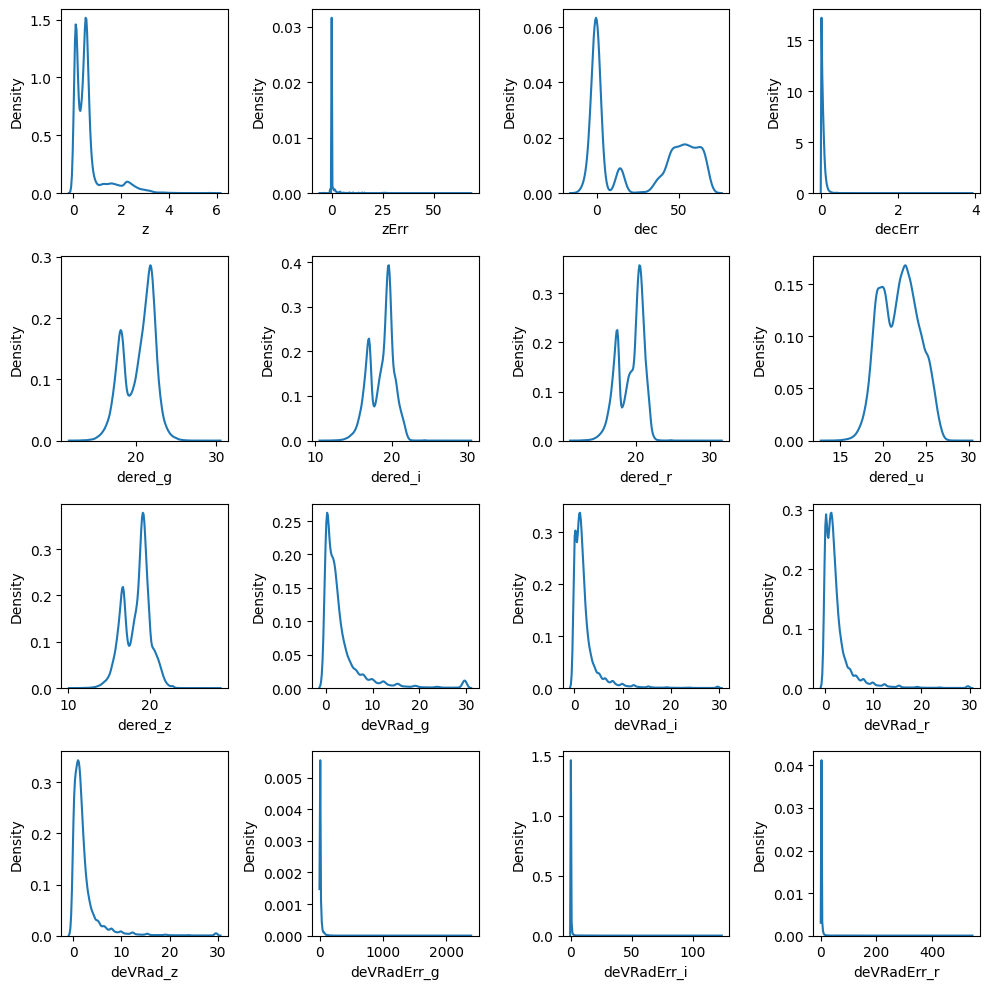

In [12]:
# Search for other NaN values

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    sns.kdeplot(data=df_clean, x=df_clean.columns[i])
    plt.xlabel(df_clean.columns[i])

plt.tight_layout()  

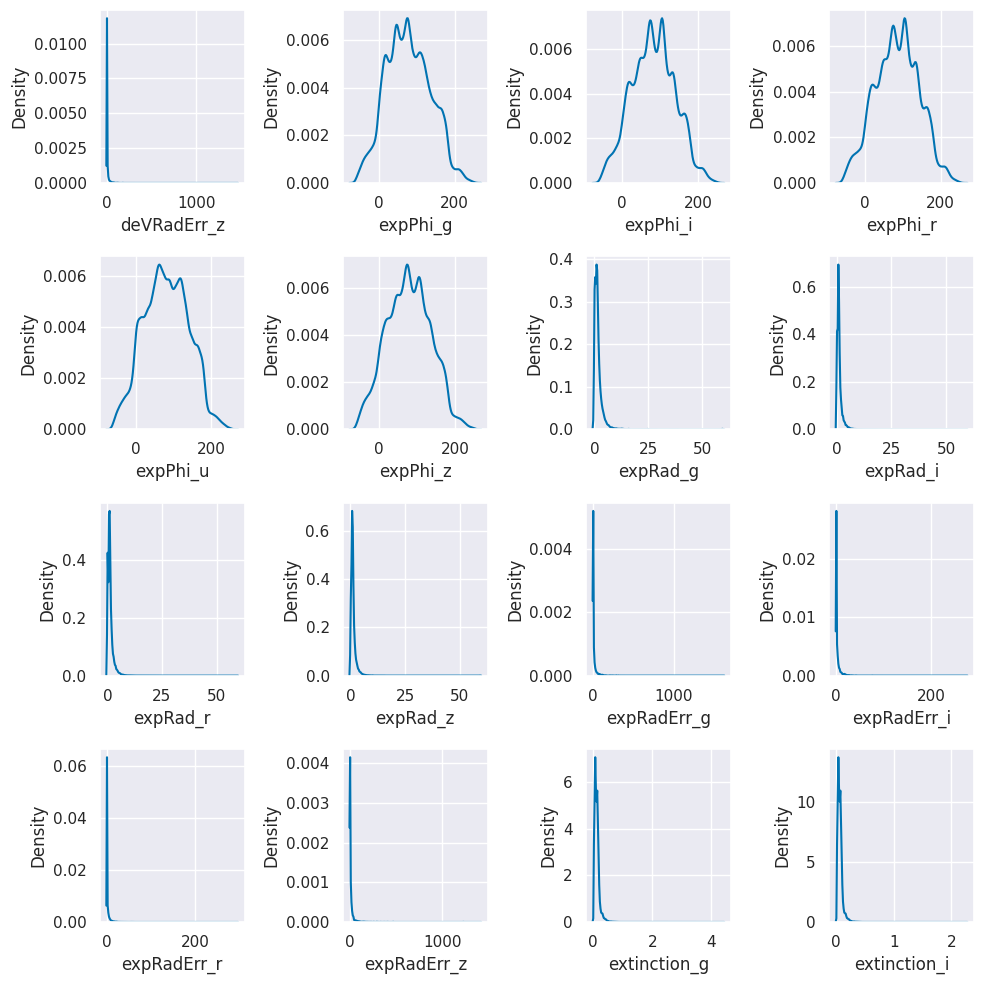

In [34]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    sns.kdeplot(data=df_clean, x=df_clean.columns[16+i])
    plt.xlabel(df_clean.columns[16+i])

plt.tight_layout()  

In [43]:
# Identify variables with several repeated values

len(df_clean)-df_clean.nunique()

z               1231
zErr            1501
dec                1
decErr             1
dered_g        17103
               ...  
psfMagErr_i     1976
psfMagErr_r     1701
psfMagErr_u      878
psfMagErr_z     1744
ra                 1
Length: 68, dtype: int64

In [45]:
len(df_clean)-df_clean.nunique()[len(df_clean)-df_clean.nunique()>800]


z               1231
zErr            1501
dered_g        17103
dered_i        20875
dered_r        20384
               ...  
psfMagErr_g     1684
psfMagErr_i     1976
psfMagErr_r     1701
psfMagErr_u      878
psfMagErr_z     1744
Length: 65, dtype: int64

In [ ]:
# Most repeated value

df_clean['dered_i'].value_counts().index[0]         

np.float64(19.55709)

In [ ]:
# Also check for multiple modes

df_clean.mode()

,z,zErr,dec,decErr,dered_g,dered_i,dered_r,dered_u,dered_z,deVRad_g,...,psfMag_i,psfMag_r,psfMag_u,psfMag_z,psfMagErr_g,psfMagErr_i,psfMagErr_r,psfMagErr_u,psfMagErr_z,ra
0,0.1097,-1.0,13.56414,0.009301,21.27772,19.55709,19.91984,18.89037,16.51312,0.0,...,20.08879,21.46262,24.63461,19.93748,0.017115,0.015189,0.013863,0.105483,0.021715,31.891871
1,NaN,NaN,NaN,NaN,21.62121,NaN,20.31316,18.93931,18.80466,NaN,...,20.36967,21.62749,NaN,22.82690,0.017365,0.015655,0.015521,0.108688,0.027406,NaN
2,NaN,NaN,NaN,NaN,21.71155,NaN,20.49151,19.26314,18.85724,NaN,...,20.46526,NaN,NaN,NaN,0.019010,0.015713,0.016911,0.109734,0.029456,NaN
3,NaN,NaN,NaN,NaN,22.06268,NaN,NaN,19.32053,19.00694,NaN,...,20.70290,NaN,NaN,NaN,0.019027,0.016530,0.017058,0.141310,0.100910,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.63030,19.02397,NaN,...,21.00064,NaN,NaN,NaN,0.019243,0.016921,0.017589,0.607201,0.101530,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.77131,19.03318,NaN,...,NaN,NaN,NaN,NaN,0.020058,0.017029,0.017867,0.686544,0.102853,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.85742,19.08713,NaN,...,NaN,NaN,NaN,NaN,0.020579,0.017531,0.018368,0.757187,0.103279,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.19481,19.09768,NaN,...,NaN,NaN,NaN,NaN,0.021845,0.017547,0.018538,NaN,0.103658,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.31738,19.09850,NaN,...,NaN,NaN,NaN,NaN,0.022652,0.017738,0.018736,NaN,0.103692,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.33643,19.09852,NaN,...,NaN,NaN,NaN,NaN,0.023054,0.018147,0.018765,NaN,0.103716,NaN


Text(0, 0.5, 'dered_r')

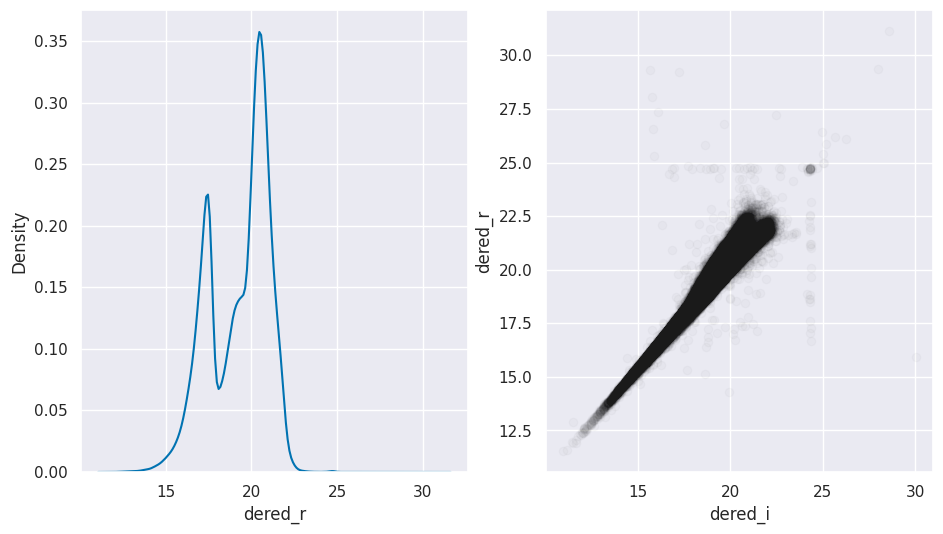

In [57]:
# Nuts

fig, ax = plt.subplots(1,2, figsize=(11,6))
sns.kdeplot(data=df_clean, x='dered_r',ax=ax[0])
ax[1].plot(df_clean['dered_i'], df_clean['dered_r'], 'ko', alpha=.02)
ax[1].set_xlabel('dered_i')
ax[1].set_ylabel('dered_r')

# Generate splits

1. Random Train-Val-Test split: 70-15-15 (seed 42)
2. Using a region of the sky for test and randomly split the remainings between train and val (seed 42)
    - Samples close to `dec=2.5` and `ra=80`
3. Using the same test region from (2) and a 2nd and 3rd region train and val sets
    - Val set: close to `dec=15` (approximately even distributed z)
    - Train set: the remaining samples    

    